In [1]:
import os, sys
import torch
from pathlib import Path
import numpy as np
import matplotlib
from matplotlib import cm
# matplotlib.use("agg")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


__file__ = os.path.dirname(os.path.realpath("__file__"))
root_dir = (Path(__file__).parent / "..").resolve()
lib_dir = (root_dir / "lib").resolve()
print("The root path: {:}".format(root_dir))
print("The library path: {:}".format(lib_dir))
assert lib_dir.exists(), "{:} does not exist".format(lib_dir)
if str(lib_dir) not in sys.path:
    sys.path.insert(0, str(lib_dir))

from datasets import ConstantGenerator, SinGenerator, SyntheticDEnv
from datasets import QuadraticFunc

The root path: /Users/xuanyidong/Desktop/AutoDL-Projects
The library path: /Users/xuanyidong/Desktop/AutoDL-Projects/lib


SyntheticDEnv(20/20 elements, ndim=1, num_per_task=100)


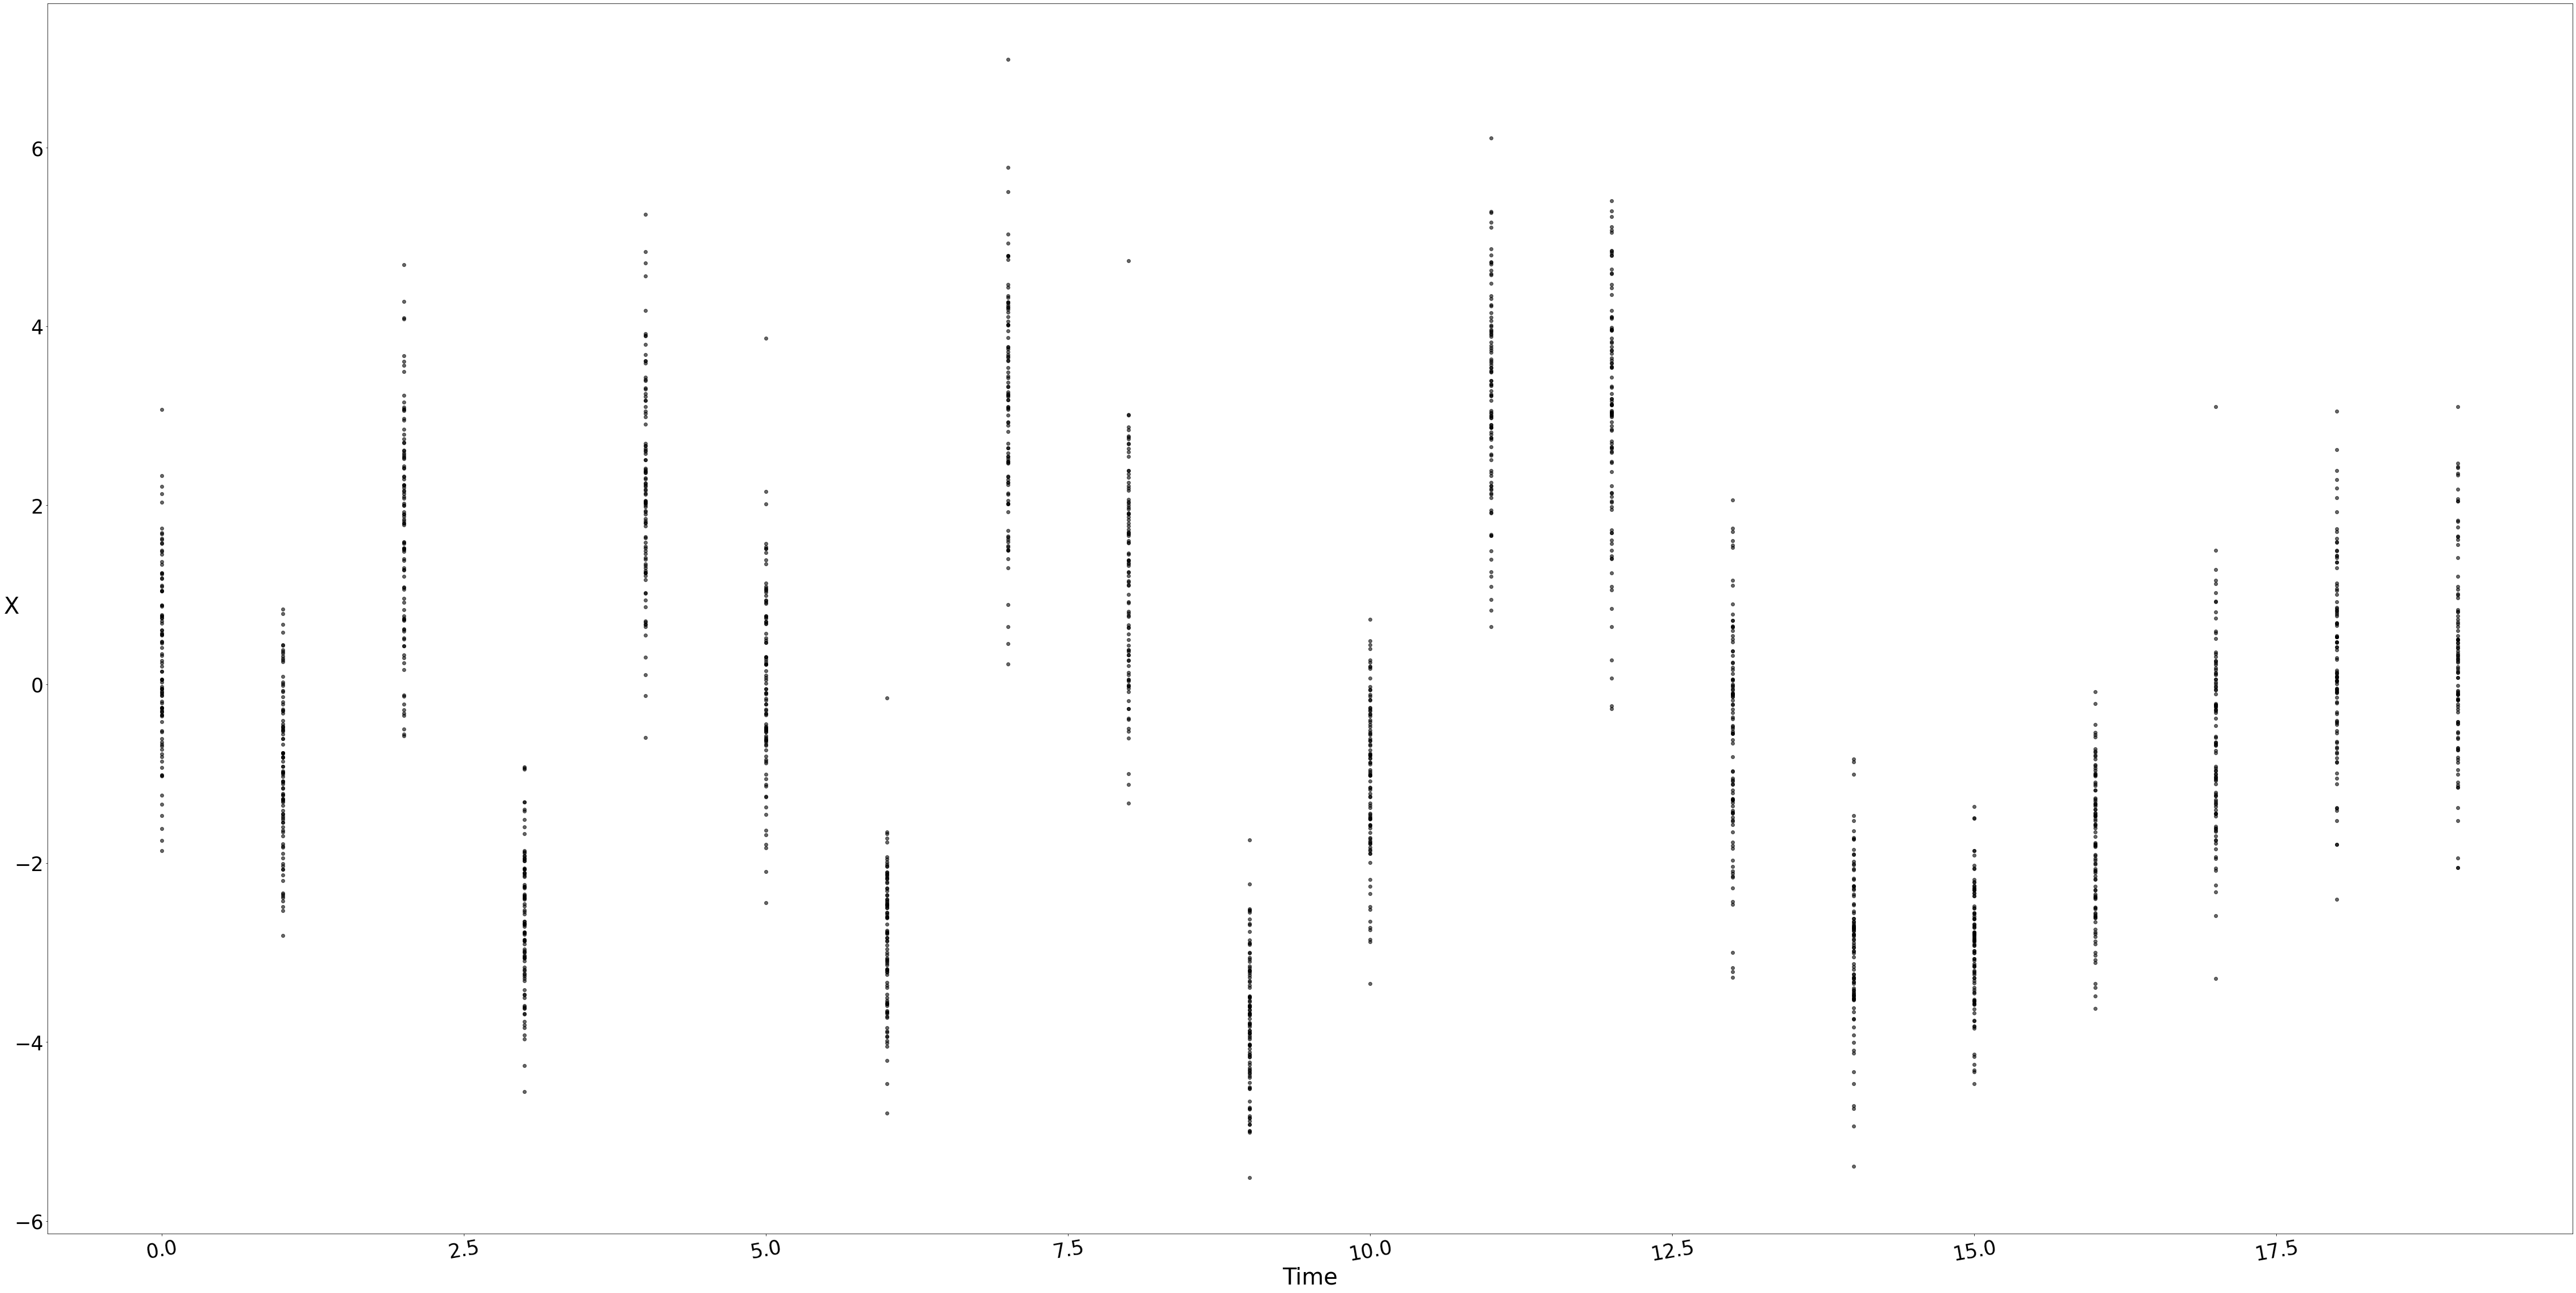

In [2]:
def visualize_env():
    
    dpi, width, height = 10, 800, 400
    figsize = width / float(dpi), height / float(dpi)
    LabelSize, LegendFontsize, font_gap = 40, 40, 5
    
    fig = plt.figure(figsize=figsize)
    
    timestamps = 20
    mean_generator = SinGenerator(num=timestamps)
    std_generator = SinGenerator(num=timestamps, min_amplitude=0.5, max_amplitude=0.5)
    std_generator.set_transform(lambda x: x + 1)
    dynamic_env = SyntheticDEnv([mean_generator], [[std_generator]], num_per_task=100)
    print(dynamic_env)
    
    xaxis, yaxis = [], []
    for timestamp, dataset in dynamic_env:
        num = dataset.shape[0]
        xaxis.append(torch.zeros(num) + timestamp)
        yaxis.append(dataset[:,0])
    xaxis = torch.cat(xaxis).numpy()
    yaxis = torch.cat(yaxis).numpy()

    cur_ax = fig.add_subplot(2, 1, 1)
    cur_ax.scatter(xaxis, yaxis, color="k", linestyle="-", alpha=0.6, label=None)
    cur_ax.set_xlabel("Time", fontsize=LabelSize)
    cur_ax.set_ylabel("X", rotation=0, fontsize=LabelSize)
    for tick in cur_ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(LabelSize - font_gap)
        tick.label.set_rotation(10)
    for tick in cur_ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(LabelSize - font_gap)
    
    cur_ax = fig.add_subplot(2, 1, 2)
    cur_ax.scatter(xaxis, yaxis, color="k", linestyle="-", alpha=0.6, label=None)
    cur_ax.set_xlabel("Time", fontsize=LabelSize)
    cur_ax.set_ylabel("X", rotation=0, fontsize=LabelSize)
    for tick in cur_ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(LabelSize - font_gap)
        tick.label.set_rotation(10)
    for tick in cur_ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(LabelSize - font_gap)
    plt.show()

visualize_env()

In [3]:
# def optimize_fn(xs, ys, test_sets):
#     xs = torch.FloatTensor(xs).view(-1, 1)
#     ys = torch.FloatTensor(ys).view(-1, 1)
    
#     model = SuperSequential(
#         SuperMLPv1(1, 10, 20, torch.nn.ReLU),
#         SuperMLPv1(20, 10, 1, torch.nn.ReLU)
#     )
#     optimizer = torch.optim.Adam(
#         model.parameters(),
#         lr=0.01, weight_decay=1e-4, amsgrad=True
#     )
#     for _iter in range(100):
#         preds = model(ys)

#         optimizer.zero_grad()
#         loss = torch.nn.functional.mse_loss(preds, ys)
#         loss.backward()
#         optimizer.step()
        
#     with torch.no_grad():
#         answers = []
#         for test_set in test_sets:
#             test_set = torch.FloatTensor(test_set).view(-1, 1)
#             preds = model(test_set).view(-1).numpy()
#             answers.append(preds.tolist())
#     return answers

# def f(x):
#     return np.cos( 0.5 * x + x * x)

# def get_data(mode):
#     dataset = SynAdaptiveEnv(mode=mode)
#     times, xs, ys = [], [], []
#     for i, (_, t, x) in enumerate(dataset):
#         times.append(t)
#         xs.append(x)
#     dataset.set_transform(f)
#     for i, (_, _, y) in enumerate(dataset):
#         ys.append(y)
#     return times, xs, ys

# def visualize_syn(save_path):
#     save_dir = (save_path / '..').resolve()
#     save_dir.mkdir(parents=True, exist_ok=True)
    
#     dpi, width, height = 40, 2000, 900
#     figsize = width / float(dpi), height / float(dpi)
#     LabelSize, LegendFontsize, font_gap = 40, 40, 5
    
#     fig = plt.figure(figsize=figsize)
    
#     times, xs, ys = get_data(None)
    
#     def draw_ax(cur_ax, xaxis, yaxis, xlabel, ylabel,
#                 alpha=0.1, color='k', linestyle='-', legend=None, plot_only=False):
#         if legend is not None:
#             cur_ax.plot(xaxis[:1], yaxis[:1], color=color, label=legend)
#         cur_ax.plot(xaxis, yaxis, color=color, linestyle=linestyle, alpha=alpha, label=None)
#         if not plot_only:
#             cur_ax.set_xlabel(xlabel, fontsize=LabelSize)
#             cur_ax.set_ylabel(ylabel, rotation=0, fontsize=LabelSize)
#             for tick in cur_ax.xaxis.get_major_ticks():
#                 tick.label.set_fontsize(LabelSize - font_gap)
#                 tick.label.set_rotation(10)
#             for tick in cur_ax.yaxis.get_major_ticks():
#                 tick.label.set_fontsize(LabelSize - font_gap)
    
#     cur_ax = fig.add_subplot(2, 1, 1)
#     draw_ax(cur_ax, times, xs, "time", "x", alpha=1.0, legend=None)

#     cur_ax = fig.add_subplot(2, 1, 2)
#     draw_ax(cur_ax, times, ys, "time", "y", alpha=0.1, legend="ground truth")
    
#     train_times, train_xs, train_ys = get_data("train")
#     draw_ax(cur_ax, train_times, train_ys, None, None, alpha=1.0, color='r', legend=None, plot_only=True)
    
#     valid_times, valid_xs, valid_ys = get_data("valid")
#     draw_ax(cur_ax, valid_times, valid_ys, None, None, alpha=1.0, color='g', legend=None, plot_only=True)
    
#     test_times, test_xs, test_ys = get_data("test")
#     draw_ax(cur_ax, test_times, test_ys, None, None, alpha=1.0, color='b', legend=None, plot_only=True)
    
#     # optimize MLP models
# #     [train_preds, valid_preds, test_preds] = optimize_fn(train_xs, train_ys, [train_xs, valid_xs, test_xs])
# #     draw_ax(cur_ax, train_times, train_preds, None, None,
# #             alpha=1.0, linestyle='--', color='r', legend="MLP", plot_only=True)
# #     import pdb; pdb.set_trace()
# #     draw_ax(cur_ax, valid_times, valid_preds, None, None,
# #             alpha=1.0, linestyle='--', color='g', legend=None, plot_only=True)
# #     draw_ax(cur_ax, test_times, test_preds, None, None,
# #             alpha=1.0, linestyle='--', color='b', legend=None, plot_only=True)

#     plt.legend(loc=1, fontsize=LegendFontsize)

#     fig.savefig(save_path, dpi=dpi, bbox_inches="tight", format="pdf")
#     plt.close("all")
#     # plt.show()

In [4]:
# Visualization
# home_dir = Path.home()
# desktop_dir = home_dir / 'Desktop'
# print('The Desktop is at: {:}'.format(desktop_dir))
# visualize_syn(desktop_dir / 'tot-synthetic-v0.pdf')